In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris,load_breast_cancer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report

# 1. 二分类问题

In [2]:
X,y=load_breast_cancer(return_X_y=True)#乳腺癌数据，二分类问题
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)#分割训练和测试数据集

(569, 30)


## 单参数搜索

Text(0, 0.5, 'score')

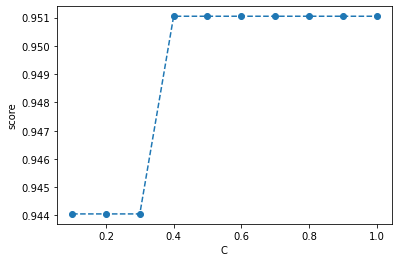

In [3]:
score=[]
C=np.arange(0.1,1.1,0.1)
for c in C:
    clf=LogisticRegression(max_iter=3000,C=c)
    clf.fit(X_train,y_train)
    score.append(clf.score(X_test,y_test))
plt.plot(C,score,'o--')
plt.xlabel('C')
plt.ylabel('score')

In [4]:
clf=LogisticRegression(max_iter=3000,C=0.4)
clf.fit(X_train,y_train)
print('test dataset:')
print(classification_report(y_true=y_train,y_pred=clf.predict(X_train),digits=3))
print('#'*60)
print('train dataset:')
print(classification_report(y_true=y_test,y_pred=clf.predict(X_test),digits=3))

test dataset:
              precision    recall  f1-score   support

           0      0.955     0.931     0.943       159
           1      0.959     0.974     0.967       267

    accuracy                          0.958       426
   macro avg      0.957     0.952     0.955       426
weighted avg      0.958     0.958     0.958       426

############################################################
train dataset:
              precision    recall  f1-score   support

           0      0.897     0.981     0.937        53
           1      0.988     0.933     0.960        90

    accuracy                          0.951       143
   macro avg      0.942     0.957     0.948       143
weighted avg      0.954     0.951     0.951       143



## 多参数网格搜索

![title](./逻辑回归求解器选择.png)

In [5]:
param_grid={
            'penalty':['l1','l2'],
            'C':C
            }
grid1 = GridSearchCV(estimator=LogisticRegression(max_iter=6000,solver='saga',),param_grid=param_grid)#使用网格搜索得到最佳模型参数
grid1.fit(X_train,y_train)
grid1.best_score_

0.9106976744186046

In [6]:
print(classification_report(y_test,grid1.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        53
           1       0.94      0.98      0.96        90

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



In [7]:
param_grid={
            'penalty':['l2'],
            'C':C
            }
grid2 = GridSearchCV(estimator=LogisticRegression(max_iter=6000,solver='lbfgs',),param_grid=param_grid)#使用网格搜索得到最佳模型参数
grid2.fit(X_train,y_train)
grid2.best_score_

0.9576744186046511

In [8]:
print(classification_report(y_test,grid2.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        53
           1       0.99      0.93      0.96        90

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



### 从上面的例子也可以看出lbfgs求解器得到的结果更好一些。

# 2. 多分类问题

In [9]:
X,y=load_iris(return_X_y=True)#鸢尾花数据，三分类问题
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)#分割训练和测试数据集

(150, 4)


In [10]:
param_grid={
            'C':C
            }
#multi_class控制二分类或多分类，默认选择是'auto'，即自动地根据输入的类别确定分类问题
grid = GridSearchCV(estimator=LogisticRegression(multi_class='auto',max_iter=6000,solver='lbfgs',penalty='l2'),\
                    param_grid=param_grid)#使用网格搜索得到最佳模型参数
grid.fit(X_train,y_train)
grid.best_score_

0.9640316205533598

In [11]:
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

